In [1]:
!pip install sodapy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
# Import the Socrata class from the sodapy library.
# It allows to interact with datasets hosted on Socrata-powered open data portals
from sodapy import Socrata
# Create an instance of the Socrata client.
# The first argument is the domain of the Socrata-powered open data portal you want to access.
# The second argument is an application token (None is passed here, which is okay for public datasets or light usage).
client = Socrata("data.buffalony.gov", None)
# Use the client to fetch data from a specific dataset on the open data portal.
# "d6g9-xbgu" is the unique identifier for the BOD311 dataset.
# The 'limit= ' parameter specifies that you want to retrieve up to 5000 records from the dataset.
results = client.get("d6g9-xbgu", limit= 400000)
df = pd.DataFrame.from_records(results)

In [3]:
import pandas as pd

# Find columns with lists as their first non-null element
list_columns = [col for col in df.columns if isinstance(df[col].iloc[0], list)]

# Convert all list elements in these columns to strings
for col in list_columns:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Find columns with dictionaries as their first non-null element
dict_columns = [col for col in df.columns if isinstance(df[col].iloc[0], dict)]

# Convert all dictionary elements in these columns to strings
for col in dict_columns:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308036 entries, 0 to 308035
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  308036 non-null  object
 1   incident_datetime            308036 non-null  object
 2   incident_type_primary        308036 non-null  object
 3   incident_description         308036 non-null  object
 4   parent_incident_type         308036 non-null  object
 5   hour_of_day                  308036 non-null  object
 6   day_of_week                  308036 non-null  object
 7   address_1                    307998 non-null  object
 8   city                         308036 non-null  object
 9   state                        308036 non-null  object
 10  location                     302216 non-null  object
 11  latitude                     307495 non-null  object
 12  longitude                    307495 non-null  object
 13  zip_code      

## Data Cleaning/Data Processing

---


**1. Eliminating Duplicate Entries**

In [5]:
df.drop_duplicates(inplace=True)

**2. Reduction of Non-essential Features**

In [6]:
df = df.drop(columns=['created_at', ':@computed_region_jdfw_hhbp', ':@computed_region_h7a8_iwt4', ':@computed_region_ff6v_jbaa',':@computed_region_vsen_jbmg',':@computed_region_nmyf_6jtp', ':@computed_region_yg52_574g' ])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308036 entries, 0 to 308035
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   case_number              308036 non-null  object
 1   incident_datetime        308036 non-null  object
 2   incident_type_primary    308036 non-null  object
 3   incident_description     308036 non-null  object
 4   parent_incident_type     308036 non-null  object
 5   hour_of_day              308036 non-null  object
 6   day_of_week              308036 non-null  object
 7   address_1                307998 non-null  object
 8   city                     308036 non-null  object
 9   state                    308036 non-null  object
 10  location                 302216 non-null  object
 11  latitude                 307495 non-null  object
 12  longitude                307495 non-null  object
 13  zip_code                 306111 non-null  object
 14  neighborhood        

**3.Creating New Columns**

In [7]:
# First, ensuring 'Incident Datetime' is in datetime format
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])

# Create separate columns for year, month, day, and time
df['Year'] = df['incident_datetime'].dt.year
df['Month'] = df['incident_datetime'].dt.month
df['Day'] = df['incident_datetime'].dt.day
df['Time'] = df['incident_datetime'].dt.time

# Display the first few rows to check the new columns
df[['incident_datetime', 'Year', 'Month', 'Day', 'Time']].head()


,incident_datetime,Year,Month,Day,Time
0,2016-06-14 01:20:00,2016,6,14,01:20:00
1,2016-12-13 05:00:00,2016,12,13,05:00:00
2,2020-07-19 03:09:00,2020,7,19,03:09:00
3,2014-11-17 08:08:00,2014,11,17,08:08:00
4,2015-04-20 10:22:00,2015,4,20,10:22:00


**4.Dropping Rows with null values**

In [8]:
df = df.dropna(subset=['location'])
print(len(df))


302216


**5.Standardizing Data Types**

In [9]:
# Convert 'incident_datetime' to datetime format for proper time series analysis

df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['hour_of_day'] = pd.to_numeric(df['hour_of_day'], errors='coerce', downcast='integer')

df['day_of_week'] = df['day_of_week'].astype('category')

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

# Convert 'latitude' and 'longitude' to float32 for precision in location data with reduced memory usage
df['latitude'] = df['latitude'].astype('float32')
df['longitude'] = df['longitude'].astype('float32')

# Change 'zip_code' to a categorical type
df['zip_code'] = df['zip_code'].astype('category')

# Adjust 'Month' to int8 type for further memory optimization
df['Month'] = df['Month'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302216 entries, 0 to 308035
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   case_number              302216 non-null  object        
 1   incident_datetime        302216 non-null  datetime64[ns]
 2   incident_type_primary    302216 non-null  object        
 3   incident_description     302216 non-null  object        
 4   parent_incident_type     302216 non-null  object        
 5   hour_of_day              302216 non-null  int8          
 6   day_of_week              302216 non-null  category      
 7   address_1                302179 non-null  object        
 8   city                     302216 non-null  object        
 9   state                    302216 non-null  object        
 10  location                 302216 non-null  object        
 11  latitude                 302216 non-null  float32       
 12  longitude       

**6.Converting all values in a column to Titlecase**

In [10]:
df['incident_type_primary'] = df['incident_type_primary'].str.title()
df['incident_description'] = df['incident_description'].str.title()
df.head()

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,...,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,Year,Month,Day,Time
0,16-1660403,2016-06-14 01:20:00,Assault,Assault,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,...,2005,District D,005500,36029005500,360290001102,360290170002003,2016,6,14,01:20:00
1,16-3480266,2016-12-13 05:00:00,Larceny/Theft,Larceny/Theft,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,...,4001,District C,002300,36029002300,360290002004,360290034004001,2016,12,13,05:00:00
3,14-3210732,2014-11-17 08:08:00,Larceny/Theft,Larceny/Theft,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,...,2008,District D,005600,36029005600,360290001102,360290163002007,2014,11,17,08:08:00
4,15-1100268,2015-04-20 10:22:00,Larceny/Theft,Larceny/Theft,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,...,2008,District D,005600,36029005600,360290001102,360290163002007,2015,4,20,10:22:00
5,15-1000814,2015-04-10 03:00:00,Burglary,Burglary,Breaking & Entering,3,Friday,400 Block GLENWOOD AV,Buffalo,NY,...,3011,District C,003302,36029003302,360290001103,360290011003009,2015,4,10,03:00:00


**7.Removing rows that have value as "UNKNOWN"**

In [11]:
for column in df.columns:
    unknown_rows = df[df[column] == 'UNKNOWN']
    if not unknown_rows.empty:
        print(f"'UNKNOWN' values found in {column}")
# Calculate the total count of 'UNKNOWN'
unknown_count = (df == 'UNKNOWN').sum().sum()
print(unknown_count)
# Remove rows where any column contains 'UNKNOWN'
df = df[~(df == 'UNKNOWN').any(axis=1)]
print(len(df))

'UNKNOWN' values found in address_1
'UNKNOWN' values found in zip_code
'UNKNOWN' values found in neighborhood
'UNKNOWN' values found in council_district_2011
'UNKNOWN' values found in census_tract
'UNKNOWN' values found in census_block_group
'UNKNOWN' values found in census_block
'UNKNOWN' values found in census_tract_2010
'UNKNOWN' values found in census_block_group_2010
'UNKNOWN' values found in census_block_2010
'UNKNOWN' values found in police_district
'UNKNOWN' values found in tractce20
'UNKNOWN' values found in geoid20_tract
'UNKNOWN' values found in geoid20_blockgroup
'UNKNOWN' values found in geoid20_block
48030
287235


**8.Renaming Column Names**

In [12]:
def to_camel_case(name):
    parts = name.strip().lower().split('_')
    return parts[0] + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287235 entries, 0 to 308035
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   caseNumber            287235 non-null  object        
 1   incidentDatetime      287235 non-null  datetime64[ns]
 2   incidentTypePrimary   287235 non-null  object        
 3   incidentDescription   287235 non-null  object        
 4   parentIncidentType    287235 non-null  object        
 5   hourOfDay             287235 non-null  int8          
 6   dayOfWeek             287235 non-null  category      
 7   address1              287198 non-null  object        
 8   city                  287235 non-null  object        
 9   state                 287235 non-null  object        
 10  location              287235 non-null  object        
 11  latitude              287235 non-null  float32       
 12  longitude             287235 non-null  float32       
 13 

In [13]:
df.drop(columns=['incidentDescription'], inplace=True)

**9. One-hot encoding**

In [14]:
df = pd.get_dummies(df, columns=['policeDistrict'])
df.tail()

,caseNumber,incidentDatetime,incidentTypePrimary,parentIncidentType,hourOfDay,dayOfWeek,address1,city,state,location,...,geoid20Block,year,month,day,time,policeDistrict_District A,policeDistrict_District B,policeDistrict_District C,policeDistrict_District D,policeDistrict_District E
308030,24-1190511,2024-04-28 03:00:00,Uuv,Theft of Vehicle,12,Sunday,300 Block SYCAMORE ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.856, 42....",...,360290025023014,2024,4,28,03:00:00,0,1,0,0,0
308031,24-1220811,2024-05-01 16:40:02,Larceny/Theft,Theft,16,Wednesday,0 Block LONGNECKER ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.808, 42....",...,360290023003000,2024,5,1,16:40:02,0,0,1,0,0
308033,24-1220367,2024-05-01 10:23:05,Larceny/Theft,Theft,10,Wednesday,2200 Block NIAGARA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.907, 42....",...,360290057002005,2024,5,1,10:23:05,0,0,0,1,0
308034,24-1220849,2024-05-01 08:00:00,Uuv,Theft of Vehicle,17,Wednesday,900 Block WASHINGTON ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.869, 42....",...,360290031004012,2024,5,1,08:00:00,0,1,0,0,0
308035,24-1220360,2024-05-01 08:57:42,Larceny/Theft,Theft,10,Wednesday,WASHINGTON ST & ST MICHAELS PL,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.872, 42....",...,360290165002004,2024,5,1,08:57:42,0,1,0,0,0


**10.Checking and removing outliers**

In [15]:
import pandas as pd

# For each numerical column, calculate the IQR and identify potential outliers
for column in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Potential outliers detected in column: {column}")


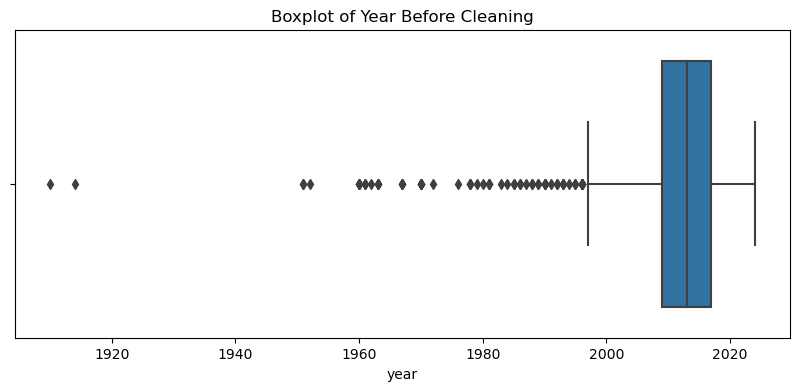

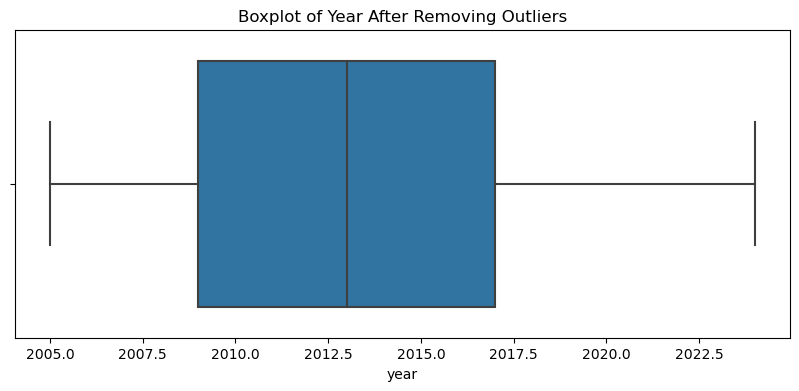

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with specified size for the boxplot before data cleaning
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['year'])
plt.title('Boxplot of Year Before Cleaning')
plt.show()

# Remove rows from the DataFrame where the 'year' is before 2005 to clean data
df = df[df['year'] >= 2005]

# Create a new figure with specified size for the boxplot after removing outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['year'])
plt.title('Boxplot of Year After Removing Outliers')
plt.show()


**11. Label Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of column names in the DataFrame that need to be encoded
columns_to_encode = ['incidentTypePrimary', 'parentIncidentType', 'dayOfWeek', 'zipCode']

# Iterate over each column that needs to be encoded
for column in columns_to_encode:
  # Create a new column in the DataFrame with '_encoded' suffix containing the encoded values
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

for column in columns_to_encode:
    print(df[[column, column + '_encoded']].head())

  incidentTypePrimary  incidentTypePrimary_encoded
0             Assault                            2
1       Larceny/Theft                            7
3       Larceny/Theft                            7
4       Larceny/Theft                            7
5            Burglary                            4
    parentIncidentType  parentIncidentType_encoded
0              Assault                           0
1                Theft                           7
3                Theft                           7
4                Theft                           7
5  Breaking & Entering                           1
  dayOfWeek  dayOfWeek_encoded
0   Tuesday                  5
1   Tuesday                  5
3    Monday                  1
4    Monday                  1
5    Friday                  0
  zipCode  zipCode_encoded
0   14207                5
1   14206                4
3   14207                5
4   14207                5
5   14208                6


In [18]:
print(df.columns)

Index(['caseNumber', 'incidentDatetime', 'incidentTypePrimary',
       'parentIncidentType', 'hourOfDay', 'dayOfWeek', 'address1', 'city',
       'state', 'location', 'latitude', 'longitude', 'zipCode', 'neighborhood',
       'councilDistrict', 'councilDistrict2011', 'censusTract',
       'censusBlockGroup', 'censusBlock', 'censusTract2010',
       'censusBlockGroup2010', 'censusBlock2010', 'tractce20', 'geoid20Tract',
       'geoid20Blockgroup', 'geoid20Block', 'year', 'month', 'day', 'time',
       'policeDistrict_District A', 'policeDistrict_District B',
       'policeDistrict_District C', 'policeDistrict_District D',
       'policeDistrict_District E', 'incidentTypePrimary_encoded',
       'parentIncidentType_encoded', 'dayOfWeek_encoded', 'zipCode_encoded'],
      dtype='object')


### **Exploratory Data Analysis**


---



**Data Inspection**

In [19]:
# Provides basic statistics for all numerical columns
df.describe()

,hourOfDay,latitude,longitude,year,month,day,policeDistrict_District A,policeDistrict_District B,policeDistrict_District C,policeDistrict_District D,policeDistrict_District E,incidentTypePrimary_encoded,parentIncidentType_encoded,dayOfWeek_encoded,zipCode_encoded
count,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000,286925.000000
mean,11.878080,42.911686,-78.849777,2013.281432,6.780423,15.659475,0.117264,0.229502,0.183846,0.236271,0.233117,6.848145,4.278345,2.962095,8.934039
std,7.318864,0.073564,0.142333,4.816471,3.317954,8.883514,0.321735,0.420514,0.387359,0.424791,0.422817,4.460525,3.198503,2.008406,4.745876
min,0.000000,42.827999,-78.910004,2005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,42.893002,-78.877998,2009.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,5.000000
50%,13.000000,42.912998,-78.848999,2013.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,3.000000,9.000000
75%,18.000000,42.935001,-78.820999,2017.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,5.000000,13.000000
max,23.000000,42.966000,-78.799004,2024.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,8.000000,6.000000,19.000000


**1. Incident Types**

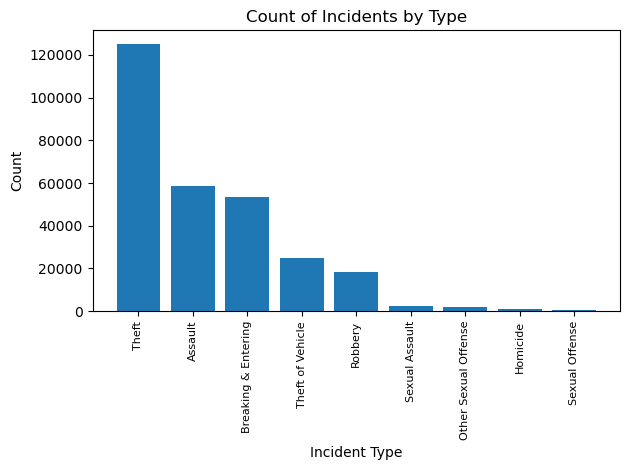

In [20]:
import matplotlib.pyplot as plt

# Get the counts of each incident type
incident_type_counts = df['parentIncidentType'].value_counts()

# Create a bar plot
plt.bar(incident_type_counts.index, incident_type_counts.values)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Count of Incidents by Type')
plt.xticks(rotation=90, fontsize=8)  # rotate x-axis labels for better readability
plt.tight_layout()  # improve spacing between plot elements
plt.show()


**2. Heatmap**

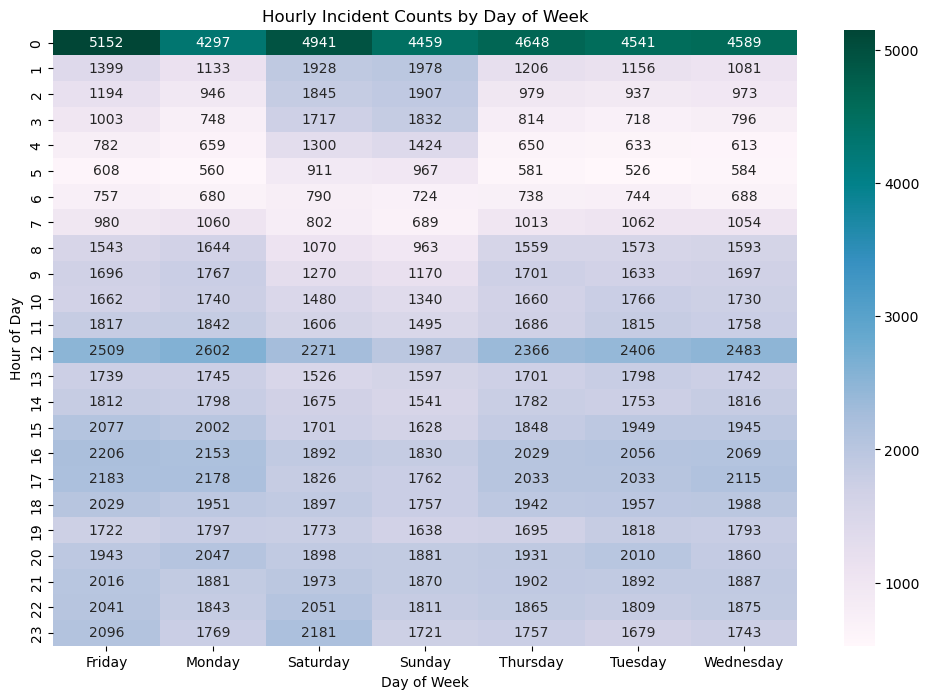

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a crosstab table with hour of day as rows and day of week as columns
hour_day_crosstab = pd.crosstab(df['hourOfDay'], df['dayOfWeek'])

# Create a heatmap from the crosstab table
plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_crosstab, cmap='PuBuGn', annot=True, fmt='d')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Hourly Incident Counts by Day of Week')
plt.show()


**3. Word Cloud**

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for incident descriptions
text = " ".join(description for description in df.neighborhood)
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

**4. Scatter plot**

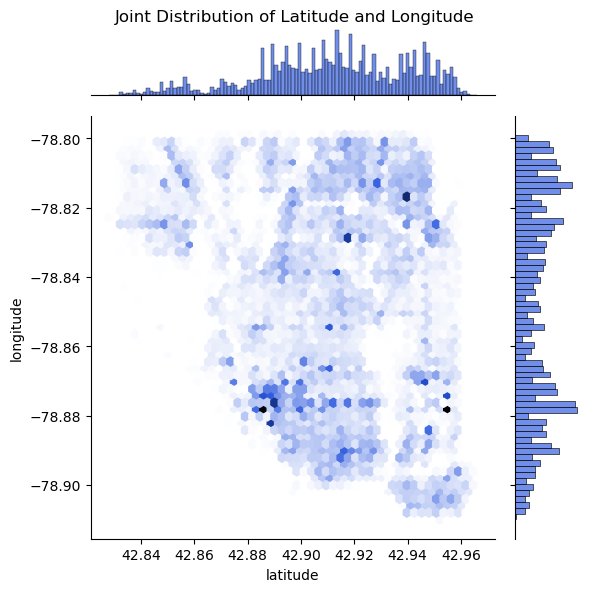

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x='latitude', y='longitude', data=df, kind='hex', color='royalblue')

# Define the title of the plot
plt.suptitle('Joint Distribution of Latitude and Longitude')

# Adjust the plot to prevent the title from being cut off
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top spacing to fit the title

# Display the plot
plt.show()


**5. Pie Chart**

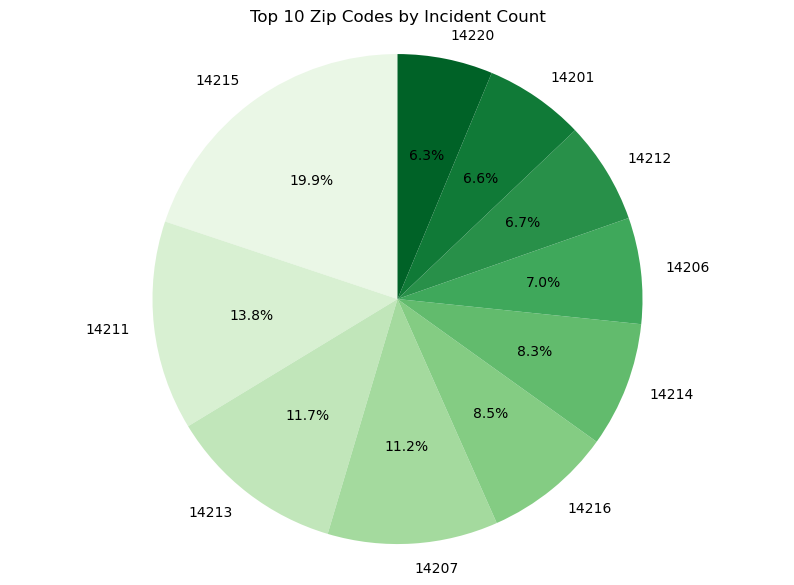

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

zip_code_counts = df['zipCode'].value_counts().head(10)

# Generate a color palette with a gradient effect based on one color
base_color = sns.color_palette('Greens', n_colors=len(zip_code_counts))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(zip_code_counts, labels=zip_code_counts.index, autopct='%1.1f%%', startangle=90, colors=base_color)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set title
plt.title('Top 10 Zip Codes by Incident Count')

# Show the pie chart
plt.show()


**6. Time Series Graph**

<Axes: xlabel='incidentDatetime'>

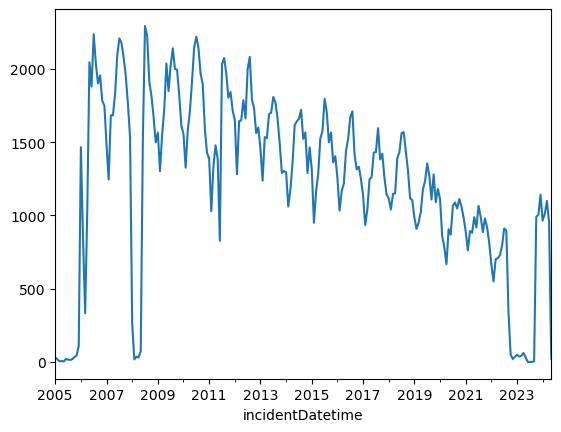

In [26]:
# Trend of incidents over time
df.set_index('incidentDatetime')['caseNumber'].resample('M').count().plot()

**7. Bar Graph**

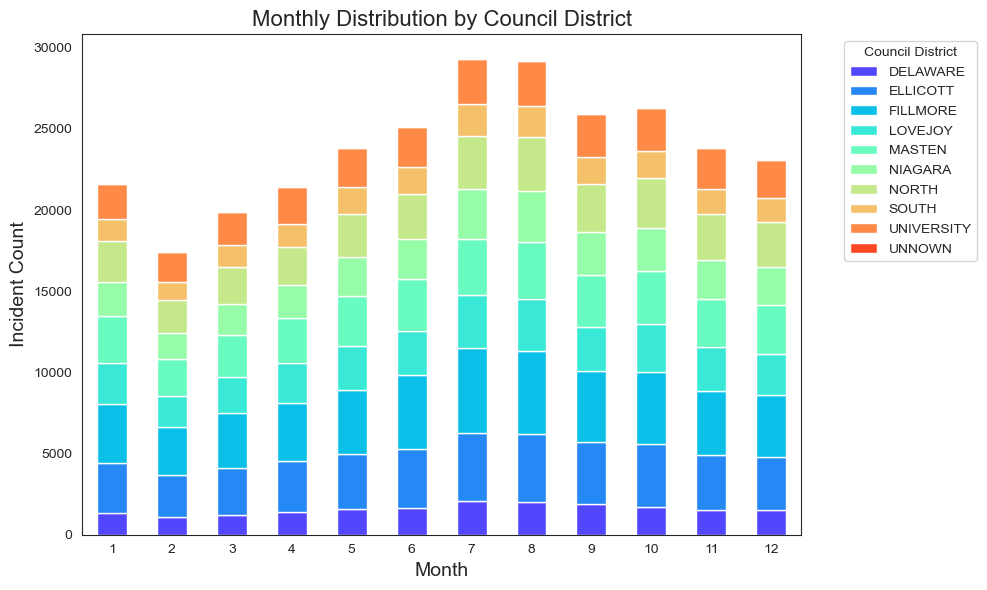

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ct = pd.crosstab(df['month'], df['councilDistrict'])

# Set the style of the plots
sns.set_style("white")

# Create a color palette
color_palette = sns.color_palette("rainbow", len(ct.columns))

# Create the stacked bar plot
ax = ct.plot(kind='bar', stacked=True, color=color_palette, figsize=(10, 6))

# Add title and labels with a larger font size for readability
plt.title('Monthly Distribution by Council District', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Incident Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Move the legend out of the plot to avoid covering the bars
plt.legend(title='Council District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

**8. Distribution of Incidents by Time of Day**

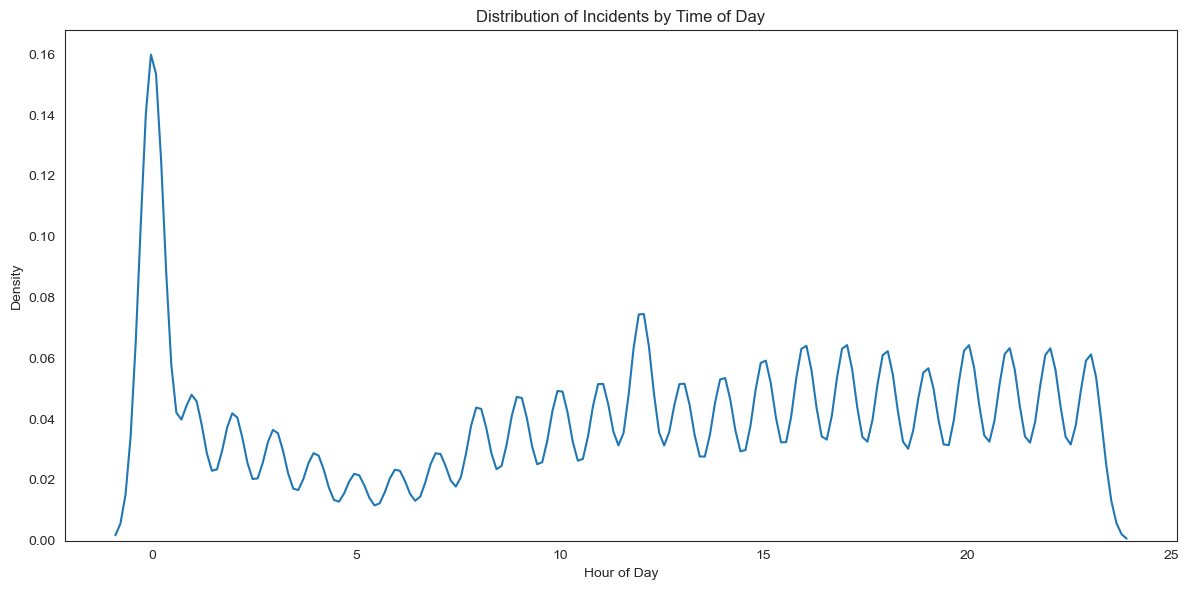

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'time' column to datetime type if it's not already
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Extract hour as a separate column for easier plotting
df['hour'] = pd.to_datetime(df['time'].astype(str)).dt.hour

# Now, let's plot the distribution of 'hour'
plt.figure(figsize=(12, 6))
sns.kdeplot(df['hour'], bw_adjust=0.5)  # 'bw_adjust' makes the KDE smoother or rougher

# Adding title and labels
plt.title('Distribution of Incidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

**9. Most Frequent Crime Type by Neighborhood**

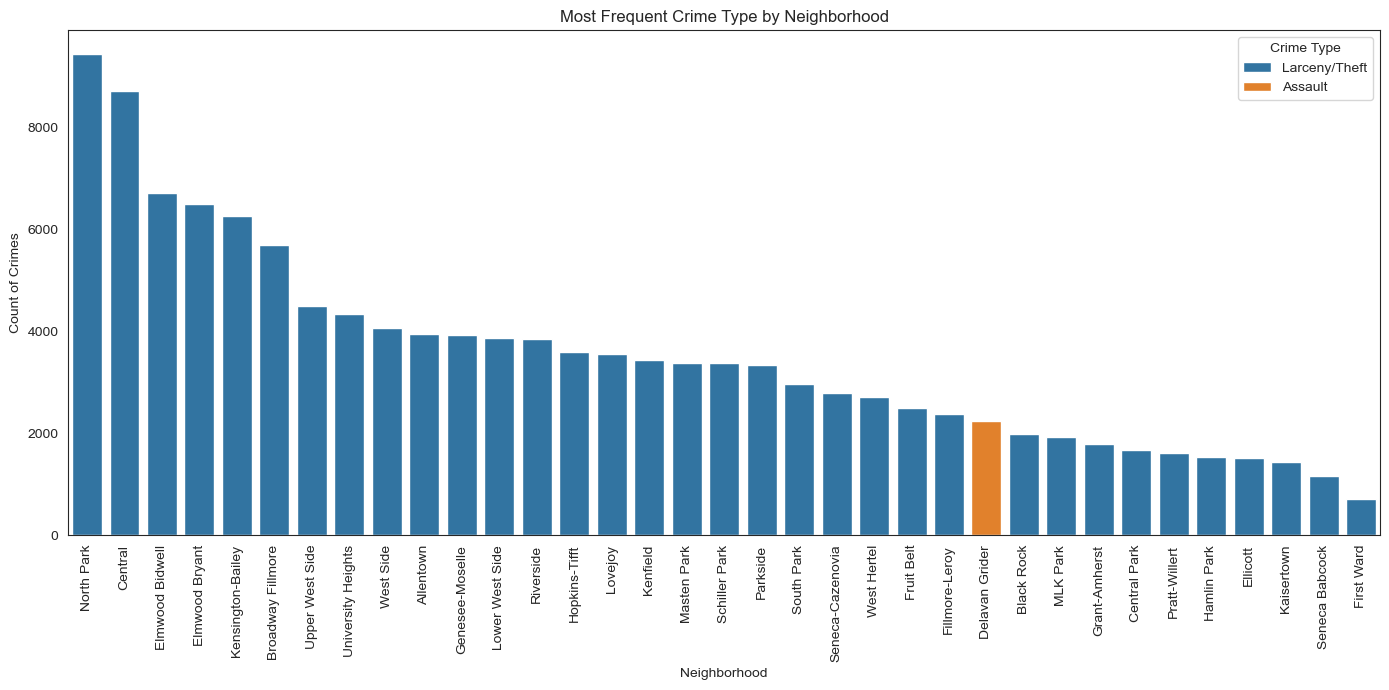

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_counts = df.groupby(['neighborhood', 'incidentTypePrimary']).size().reset_index(name='counts')

# Sort the results to find the maximum crime type for each neighborhood
crime_counts_sorted = crime_counts.sort_values('counts', ascending=False)

# Drop duplicates to keep only the top crime per neighborhood
top_crime_per_neighborhood = crime_counts_sorted.drop_duplicates(subset='neighborhood', keep='first')

# Now you can plot this information
plt.figure(figsize=(14, 7))
sns.barplot(data=top_crime_per_neighborhood, x='neighborhood', y='counts', hue='incidentTypePrimary', dodge=False)
plt.xticks(rotation=90)
plt.title('Most Frequent Crime Type by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Crimes')
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

**10. Distribution of Top 6 Incident Types in Top 5 Neighborhoods**

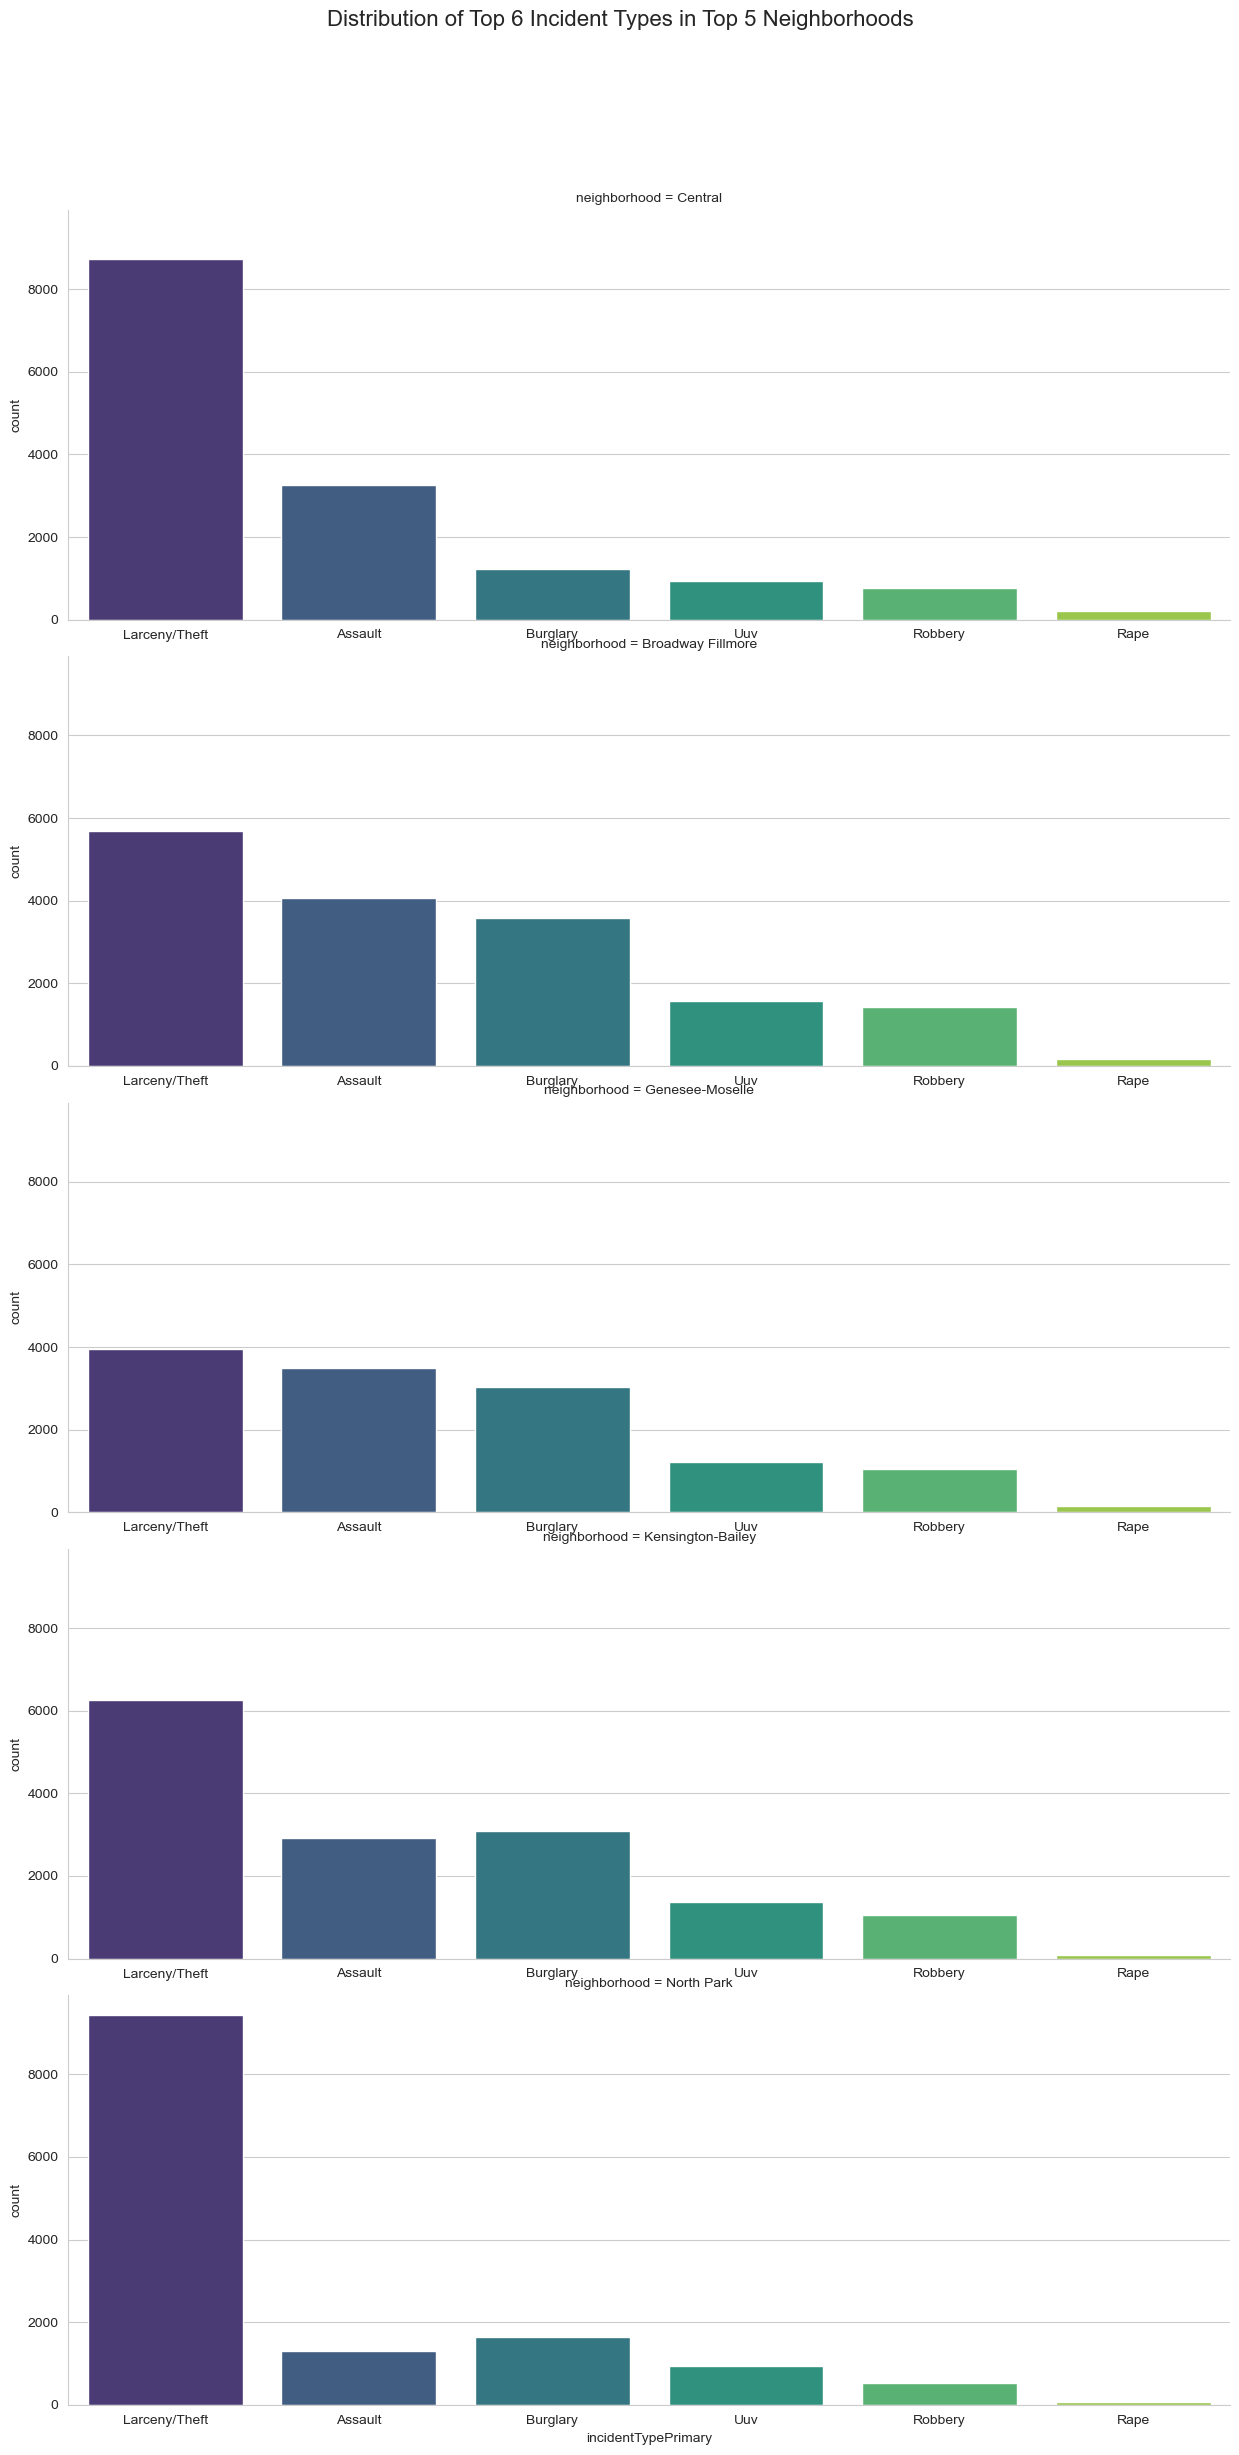

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Narrowing down to the top 5 neighborhoods with the most incidents
top_neighborhoods = df['neighborhood'].value_counts().head(5).index

# Find the top 6 incident types within these neighborhoods
top_incidents = df[df['neighborhood'].isin(top_neighborhoods)]['incidentTypePrimary'].value_counts().head(6).index

# Filter the DataFrame to include only the top 5 neighborhoods and the top 6 incidents
top_df = df[df['neighborhood'].isin(top_neighborhoods) & df['incidentTypePrimary'].isin(top_incidents)]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a FacetGrid object with one row for each top neighborhood
g = sns.FacetGrid(top_df, row="neighborhood", height=5, aspect=2.5, sharex=True)

# Map a seaborn countplot to show the distribution of top incident types within each top neighborhood
g.map(sns.countplot, "incidentTypePrimary", order=top_incidents, palette='viridis')

# Rotate the x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(0)

# Adjust the layout and add a title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Top 6 Incident Types in Top 5 Neighborhoods', fontsize=16)

# Show the plot
plt.show()

11. Heat Map

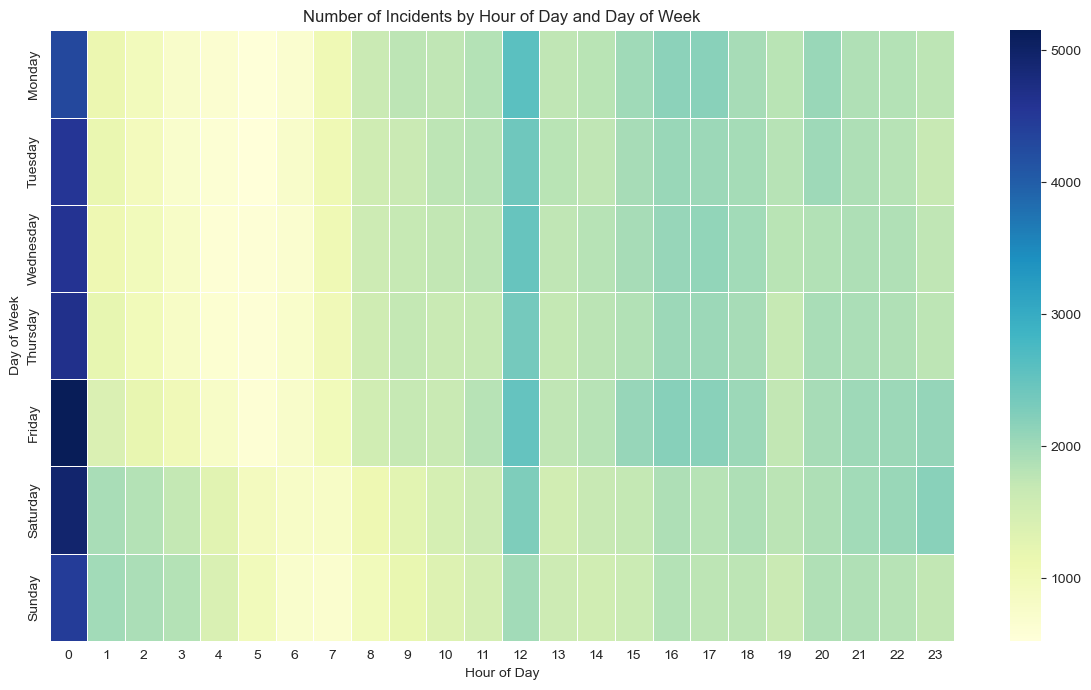

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# First, create a new column combining 'dayOfWeek' and 'hourOfDay' to count occurrences
df['day_hour'] = df['dayOfWeek'].astype(str) + '_' + df['hourOfDay'].astype(str)

# Create a crosstab that counts the number of occurrences for each combination of 'dayOfWeek' and 'hourOfDay'
incidents_crosstab = pd.crosstab(index=df['dayOfWeek'], columns=df['hourOfDay'])

# Convert 'dayOfWeek' to an ordered category to ensure the days are ordered correctly in the plot
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
incidents_crosstab = incidents_crosstab.reindex(ordered_days)

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(incidents_crosstab, annot=False, cmap='YlGnBu', linewidths=0.5)

# Adding title and labels
plt.title('Number of Incidents by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Show the plot
plt.tight_layout()
plt.show()



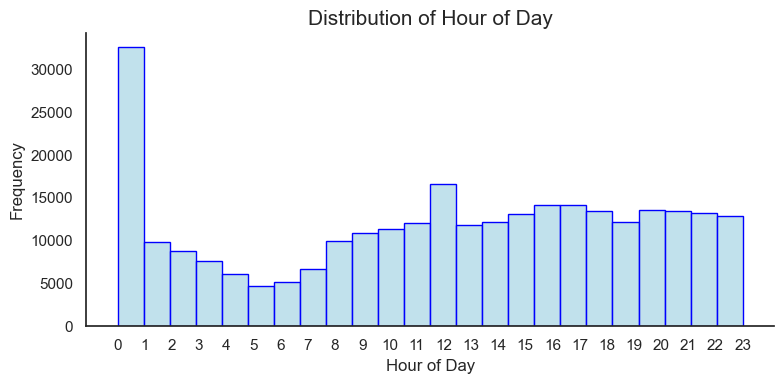

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")  # Set the aesthetic style of the plots without grids

plt.figure(figsize=(8, 4))  # Define the size of the figure
ax = sns.histplot(df['hourOfDay'], bins=24, kde=False, color='lightblue', edgecolor='blue')  # Create a histogram

ax.set_title('Distribution of Hour of Day', fontsize=15)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

ax.set_xticks(range(0, 24))  # Define the x-axis ticks
ax.grid(False)  # Turn off the grid background

sns.despine()  # Remove the top and right spines for a cleaner look

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

In [33]:
df.to_csv('file.csv')

# ALGORITHMS

<Figure size 400x400 with 0 Axes>

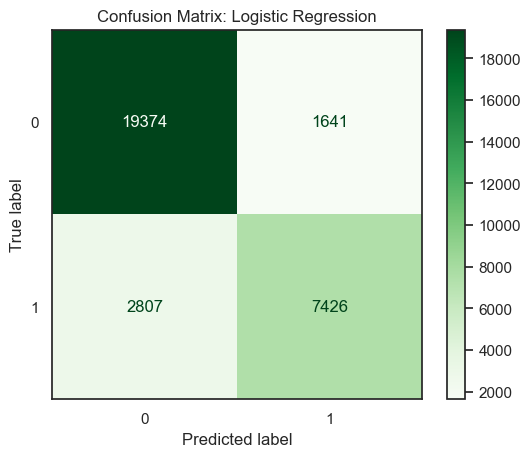

Logistic Regression Metrics:
Accuracy: 0.8577
Precision: 0.8190
Recall: 0.7257
F1 Score: 0.7695



<Figure size 400x400 with 0 Axes>

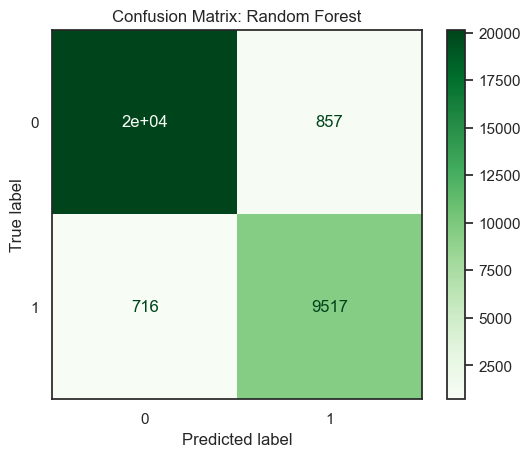

Random Forest Metrics:
Accuracy: 0.9497
Precision: 0.9174
Recall: 0.9300
F1 Score: 0.9237



<Figure size 400x400 with 0 Axes>

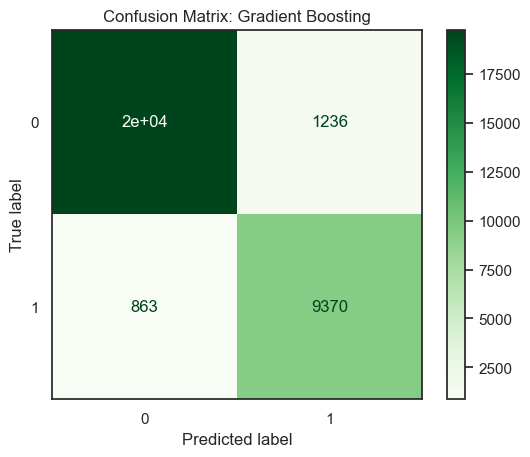

Gradient Boosting Metrics:
Accuracy: 0.9328
Precision: 0.8835
Recall: 0.9157
F1 Score: 0.8993



<Figure size 400x400 with 0 Axes>

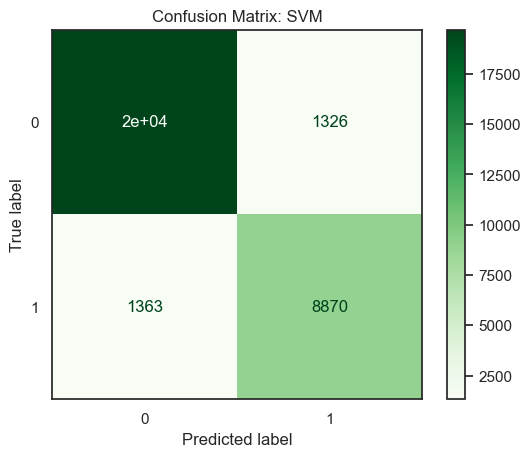

SVM Metrics:
Accuracy: 0.9139
Precision: 0.8699
Recall: 0.8668
F1 Score: 0.8684



<Figure size 400x400 with 0 Axes>

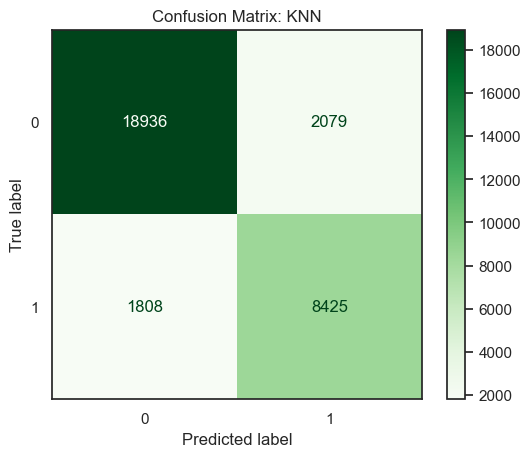

KNN Metrics:
Accuracy: 0.8756
Precision: 0.8021
Recall: 0.8233
F1 Score: 0.8126



<Figure size 400x400 with 0 Axes>

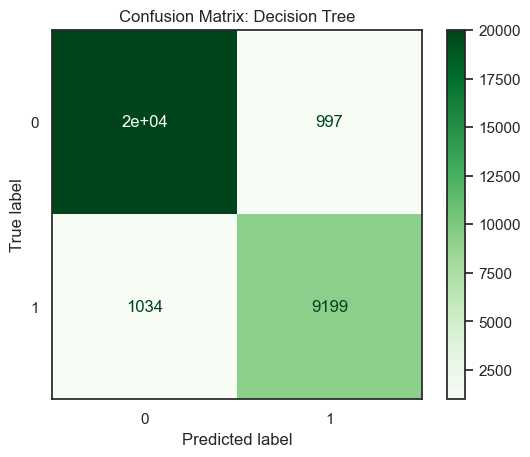

Decision Tree Metrics:
Accuracy: 0.9350
Precision: 0.9022
Recall: 0.8990
F1 Score: 0.9006



<Figure size 400x400 with 0 Axes>

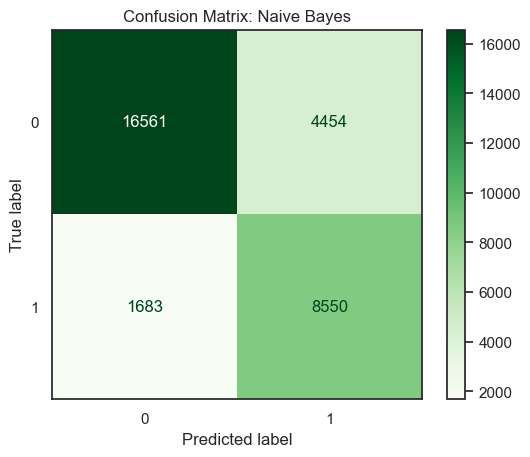

Naive Bayes Metrics:
Accuracy: 0.8036
Precision: 0.6575
Recall: 0.8355
F1 Score: 0.7359



In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Data Preprocessing
df['lat'] = pd.to_numeric(df['latitude'], errors='coerce')
df['long'] = pd.to_numeric(df['longitude'], errors='coerce')
df['datetime'] = pd.to_datetime(df['incidentDatetime'])

# Feature Extraction
features = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'WeekOfYear', 'IsWeekend']
attrs = ['year', 'month', 'day', 'hour', 'dayofweek', lambda x: x.isocalendar().week, lambda x: x.dayofweek >= 5]

for feature, attr in zip(features, attrs):
    df[feature] = df['datetime'].apply(attr if callable(attr) else lambda x: getattr(x, attr))

encoder = LabelEncoder()
df['incidentType'] = encoder.fit_transform(df['incidentTypePrimary'])
df['district'] = encoder.fit_transform(df['councilDistrict'].astype(str))

# Missing Values
imputer = SimpleImputer(strategy='mean')
df[['lat', 'long']] = imputer.fit_transform(df[['lat', 'long']])

# Aggregating Features
agg_rules = {
    'Weekday': 'max', 'Hour': 'mean', 'WeekOfYear': 'max', 'IsWeekend': 'max',
    'lat': 'mean', 'long': 'mean', 'incidentType': 'sum', 'district': 'max'
}
daily_data = df.groupby(['zipCode', 'Year', 'Month', 'Day']).agg(agg_rules).reset_index()

# Target Variable
daily_data['Crimes'] = df.groupby(['zipCode', 'Year', 'Month', 'Day']).size().values
median_crimes = daily_data.groupby('zipCode')['Crimes'].transform('median')
daily_data['HighCrime'] = (daily_data['Crimes'] > median_crimes).astype(int)

# Split Data
X = daily_data.drop(['Crimes', 'HighCrime'], axis=1)
y = daily_data['HighCrime']
X['zipCode'] = encoder.fit_transform(X['zipCode'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation
for name, model in models.items():
    # Model Training
    if name in ["SVM", "NB"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        test_data = X_test_scaled
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        test_data = X_test

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 4))
    ConfusionMatrixDisplay.from_estimator(model, test_data, y_test, cmap='Greens')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

    # Print Metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, preds, zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds, zero_division=0):.4f}\n")


In [33]:
import joblib

# Extracting the trained Random Forest model
random_forest_model = models['Random Forest']

# Saving the model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [44]:
df.to_csv('file.csv')